# **Desaprendiendo estereotipos en Aprendizaje Automático**

##Trabajo práctico nº2

Integrantes:


*   Susana Araujo
*   Ivana Feldfeber
*   Tamara Maggioni

#**1. Instalación y validación de la librería responsibly**

In [ ]:
import matplotlib
import gensim

In [ ]:
!pip install --user responsibly

In [ ]:
import responsibly 
# Debimos reiniciar el entorno de ejecucion para importar correctamente responsibly en Colab

In [ ]:
responsibly.__version__

'0.1.3'

In [ ]:
import warnings
warnings.filterwarnings('ignore')

#**2. Diagnosticando sesgos de nivel-socioeconómico**

1.   **Definición**: decidimos trabajar sobre la evaluación de un posible sesgo en el uso de palabras en cuanto al nivel socio-económico. Específicamente, decidimos evaluar si el uso de ciertos adjetivos o categorizaciones están asociados a la designación de una persona a un determinado estrato social. 
2.   **Diagnosticar**: para diagnosticar si nuestro embedding está sesgado en relación a nuestra definición de sesgo, vamos a evaluar las siguientes palabras asociadas a ambos extremos del nivel de ingresos: pobreza, pobre, indigente e indigencia (bajos ingresos) y acaudalado/a, enriquecimiento y riqueza (altos ingresos). 
3.  **Mitigación**:

In [ ]:
# Descargar el modelo e importar librerías necesarias para trabajar en español
import numpy as np
import logging

from numpy.linalg import norm
from gensim.models import KeyedVectors
from sklearn.metrics import classification_report, accuracy_score

logging.basicConfig(format='%(asctime)s : %(message)s', level=logging.INFO)

!wget -q http://dcc.uchile.cl/~jperez/word-embeddings/fasttext-sbwc.100k.vec.gz

!gzip -d -q fasttext-sbwc.100k.vec.gz
!ls

fasttext-sbwc.100k.vec	sample_data


#**3. Exploración del sesgo socioeconómico**

In [ ]:
we_es = KeyedVectors.load_word2vec_format('fasttext-sbwc.100k.vec')
# Esto normaliza los vectores
we_es.init_sims(replace=True)

2021-12-05 14:36:20,378 : loading projection weights from fasttext-sbwc.100k.vec
2021-12-05 14:36:52,845 : loaded (100000, 300) matrix from fasttext-sbwc.100k.vec
2021-12-05 14:36:52,849 : precomputing L2-norms of word weight vectors


In [ ]:
# Todos los vectores deberían tener norma 1, o cercana a 1

from numpy.testing import assert_almost_equal

length_vectors = norm(we_es.vectors_norm, axis=1)

assert_almost_equal(actual=length_vectors,
                    desired=1,
                    decimal=5)

### 3.a. **Acaudalado/a vs. pobre, pobreza, indigente, indigencia**

In [ ]:
we_es.most_similar(positive=['acaudalado'],negative=['pobre'])

[('acaudalados', 0.43424752354621887),
 ('acaudalada', 0.3820391893386841),
 ('naviero', 0.3686026334762573),
 ('empresario', 0.3673766553401947),
 ('financista', 0.36122995615005493),
 ('filántropo', 0.35798555612564087),
 ('hacendado', 0.33088910579681396),
 ('adinerado', 0.32979580760002136),
 ('magnate', 0.32935506105422974),
 ('terrateniente', 0.3198912739753723)]

In [ ]:
we_es.most_similar(positive=['pobre'],negative=['acaudalado'])

[('paupérrima', 0.40233248472213745),
 ('deficiente', 0.3777438700199127),
 ('deficientes', 0.34917011857032776),
 ('mala', 0.3468587398529053),
 ('mediocre', 0.31820404529571533),
 ('inadecuada', 0.31413936614990234),
 ('paupérrimo', 0.310539186000824),
 ('pésima', 0.3094373047351837),
 ('carencias', 0.2961694002151489),
 ('desnutridos', 0.2958577871322632)]

In [ ]:
we_es.most_similar(positive=['acaudalada'],negative=['pobre'])

[('acaudalados', 0.3906598389148712),
 ('acaudalado', 0.3357734680175781),
 ('filántropa', 0.3287029266357422),
 ('adinerada', 0.32399556040763855),
 ('aristocrática', 0.31514889001846313),
 ('adineradas', 0.3076646327972412),
 ('condes', 0.3036932647228241),
 ('adinerados', 0.29249781370162964),
 ('aristócrata', 0.2922135889530182),
 ('nobiliaria', 0.28770434856414795)]

In [ ]:
we_es.most_similar(positive=['pobre'],negative=['acaudalada'])

[('deficiente', 0.4087983965873718),
 ('paupérrimo', 0.39729100465774536),
 ('mediocre', 0.37447747588157654),
 ('deficientes', 0.3454912006855011),
 ('paupérrima', 0.3447824716567993),
 ('pésimo', 0.3416995704174042),
 ('mala', 0.3252671957015991),
 ('carencias', 0.3238861560821533),
 ('raquítico', 0.3182603120803833),
 ('pobrecito', 0.31490543484687805)]

En una primera aproxiamción, podemos ver cómo aparecen adjetivaciones o caracterizaciones sesgadas asociadas la palabra pobre (**mala, mediocre, pésima**), lo que no ocurre para las palabras acaudalado o acuadalada, las que aparecen asociadas a ciertas profesiones o actividades propias de personas con recursos. 

In [ ]:
we_es.most_similar(positive=['pobreza'],negative=['acaudalada'])

[('subdesarrollo', 0.43983426690101624),
 ('malnutrición', 0.42508697509765625),
 ('desnutrición', 0.40622177720069885),
 ('hambre', 0.4038534164428711),
 ('marginación', 0.4026400148868561),
 ('delp', 0.398052841424942),
 ('erradicación', 0.393252432346344),
 ('analfabetismo', 0.38571542501449585),
 ('odm', 0.37094587087631226),
 ('desertificación', 0.36795613169670105)]

In [ ]:
we_es.most_similar(positive=['pobreza'],negative=['acaudalado'])

[('malnutrición', 0.43992358446121216),
 ('subdesarrollo', 0.43919652700424194),
 ('marginación', 0.43154457211494446),
 ('erradicación', 0.42546284198760986),
 ('desnutrición', 0.4074207544326782),
 ('hambre', 0.4007423520088196),
 ('extrema', 0.3879070580005646),
 ('analfabetismo', 0.3818328082561493),
 ('marginalización', 0.3780117928981781),
 ('odm', 0.3698006272315979)]

In [ ]:
we_es.most_similar(positive=['acaudalada'],negative=['pobreza'])

[('acaudalado', 0.5244727730751038),
 ('adinerada', 0.46732598543167114),
 ('acomodada', 0.44291555881500244),
 ('acaudalados', 0.42830586433410645),
 ('adinerado', 0.42659538984298706),
 ('aristócrata', 0.420971155166626),
 ('aristocrática', 0.402455598115921),
 ('terrateniente', 0.3631148934364319),
 ('pudiente', 0.3610510230064392),
 ('comerciante', 0.3583795130252838)]

In [ ]:
we_es.most_similar(positive=['acaudalado'],negative=['pobreza'])

[('adinerado', 0.5059764981269836),
 ('acaudalada', 0.4645431637763977),
 ('comerciante', 0.4537172019481659),
 ('hacendado', 0.4402766823768616),
 ('acaudalados', 0.43926888704299927),
 ('filántropo', 0.42629551887512207),
 ('aristócrata', 0.41402921080589294),
 ('negociante', 0.4098464846611023),
 ('naviero', 0.40465420484542847),
 ('terrateniente', 0.40149933099746704)]

Cuando analizamos la palabra pobreza en vez de pobre, vemos que no se asocia a sesgos como con pobre, sino más bien con descripciones de la situación o condiciones que padecen las personas en estado de pobreza. 

Acaudalada o acaudalado, en comparación con pobreza, sí se asocian con **acomodada, comerciante, terrateniente, naviero**. 

In [ ]:
we_es.most_similar(positive=['indigente'],negative=['acaudalada'])

[('indigentes', 0.37750038504600525),
 ('drogado', 0.350813627243042),
 ('taxista', 0.34370943903923035),
 ('recluso', 0.3369329571723938),
 ('agresor', 0.33224737644195557),
 ('agredido', 0.32896900177001953),
 ('asaltante', 0.3283239006996155),
 ('quejoso', 0.3266138732433319),
 ('trailero', 0.32649359107017517),
 ('atracador', 0.3249642252922058)]

In [ ]:
we_es.most_similar(positive=['indigente'],negative=['acaudalado'])

[('indigentes', 0.41657590866088867),
 ('apuñalamiento', 0.324359655380249),
 ('agresor', 0.321167916059494),
 ('victima', 0.3033747673034668),
 ('agresora', 0.3004763424396515),
 ('carbonizados', 0.29989808797836304),
 ('discapacitada', 0.297084778547287),
 ('inconsciente', 0.29667454957962036),
 ('recluso', 0.2958819568157196),
 ('hipotermia', 0.2929873466491699)]

En cuanto a la palabra indigente, se asocian **drogado, taxista, recluso, agresor, agredido, asaltante, quejoso, trailero y atracador** cuando se vincula a la palabra acaudalada, mientras que cuando se vincula a la palabra acaudalado, aparencen **apuñalamiento, agresor, vicitima, agresora, carbonizados, discapacitada, inconsciente, recluso e hipotermia**.

In [ ]:
we_es.most_similar(positive=['acaudalado'],negative=['indigente'])

[('acaudalados', 0.48897093534469604),
 ('acaudalada', 0.4482652544975281),
 ('terrateniente', 0.3597787022590637),
 ('adinerado', 0.35317346453666687),
 ('hacendado', 0.34072500467300415),
 ('fortunas', 0.3393545150756836),
 ('adinerados', 0.309868186712265),
 ('financista', 0.30238133668899536),
 ('naviero', 0.30177515745162964),
 ('adinerada', 0.2990885376930237)]

In [ ]:
we_es.most_similar(positive=['acaudalada'],negative=['indigente'])

[('acaudalados', 0.43915805220603943),
 ('adinerada', 0.41473388671875),
 ('aristocrática', 0.4077414870262146),
 ('acaudalado', 0.3751998543739319),
 ('aristocráticas', 0.368648499250412),
 ('aristocracia', 0.3665446639060974),
 ('adineradas', 0.35384267568588257),
 ('adinerados', 0.3505280613899231),
 ('filántropa', 0.34499454498291016),
 ('acomodada', 0.33715885877609253)]

In [ ]:
we_es.most_similar(positive=['acaudalada'],negative=['indigencia'])

[('acaudalado', 0.4657156467437744),
 ('adinerada', 0.4284781217575073),
 ('acaudalados', 0.38996511697769165),
 ('aristócrata', 0.36769217252731323),
 ('acomodada', 0.36322999000549316),
 ('aristocrática', 0.36239004135131836),
 ('adinerado', 0.3571985363960266),
 ('filántropa', 0.35047632455825806),
 ('terrateniente', 0.3468703031539917),
 ('distinguida', 0.3286561667919159)]

In [ ]:
we_es.most_similar(positive=['indigencia'],negative=['acaudalada'])

[('pobreza', 0.4200371503829956),
 ('desnutrición', 0.3839094042778015),
 ('marginalidad', 0.36428800225257874),
 ('miseria', 0.3567997217178345),
 ('desesperanza', 0.3526471257209778),
 ('hambre', 0.35061115026474),
 ('precariedad', 0.34893155097961426),
 ('desamparo', 0.3452332019805908),
 ('hacinamiento', 0.34123533964157104),
 ('malnutrición', 0.3393033742904663)]

In [ ]:
we_es.most_similar(positive=['acaudalado'],negative=['indigencia'])

[('adinerado', 0.45060425996780396),
 ('acaudalada', 0.4374433159828186),
 ('acaudalados', 0.41010648012161255),
 ('hacendado', 0.404211163520813),
 ('terrateniente', 0.3946188688278198),
 ('filántropo', 0.3873409628868103),
 ('comerciante', 0.3856081962585449),
 ('empresario', 0.3749510645866394),
 ('magnate', 0.3708599805831909),
 ('naviero', 0.3700130879878998)]

In [ ]:
we_es.most_similar(positive=['indigencia'],negative=['acaudalado'])

[('pobreza', 0.45844268798828125),
 ('marginalidad', 0.39748841524124146),
 ('desnutrición', 0.3929930031299591),
 ('extrema', 0.3737005591392517),
 ('marginación', 0.37164369225502014),
 ('miseria', 0.36594879627227783),
 ('malnutrición', 0.36429697275161743),
 ('hambre', 0.3555822968482971),
 ('desnutridos', 0.35019123554229736),
 ('desamparo', 0.34584930539131165)]

Cuando de analiza la palabra indigencia en vez de indigente, las palabras asociadas no están sesgadas. En cambio, aparecen palabras descriptivas de la situación o de las condiciones que padecen las personas en esa situación. Lo mismo que sucedión con pobre y pobreza. 

De la misma manera, acudalado/a aparecen asociados a **financista, naviero, terrateniente, distinguida, acomodada, empresario, comerciante y hacendado** en relación a indigencia e indigente.

### 3.b. **Enriquecimiento vs. pobre, pobreza, indigente, indigencia**

In [ ]:
we_es.most_similar(positive=['pobre'],negative=['enriquecimiento'])

[('paupérrima', 0.3801010251045227),
 ('miserable', 0.3668692409992218),
 ('desgraciada', 0.36437860131263733),
 ('mediocre', 0.3617040812969208),
 ('humilde', 0.3557698428630829),
 ('fea', 0.35368776321411133),
 ('infeliz', 0.3513190746307373),
 ('paupérrimo', 0.34324172139167786),
 ('indigente', 0.342869371175766),
 ('pobrecito', 0.3428211808204651)]

In [ ]:
we_es.most_similar(positive=['enriquecimiento'],negative=['pobre'])

[('reprocesamiento', 0.3976472020149231),
 ('centrifugadoras', 0.30950599908828735),
 ('natanz', 0.30478519201278687),
 ('reelaboración', 0.29644274711608887),
 ('ilícito', 0.28068095445632935),
 ('uf0', 0.27418532967567444),
 ('enriquecido', 0.2734544277191162),
 ('peculado', 0.2672046720981598),
 ('fisibles', 0.2660774886608124),
 ('oiea', 0.2644801139831543)]

In [ ]:
we_es.most_similar(positive=['enriquecimiento'],negative=['indigente'])

[('reprocesamiento', 0.3913732171058655),
 ('enriquecido', 0.36580565571784973),
 ('enriquecer', 0.3398727774620056),
 ('reelaboración', 0.3118135929107666),
 ('enriquecidas', 0.31008198857307434),
 ('centrifugadoras', 0.3072305917739868),
 ('enriqueciendo', 0.3064853549003601),
 ('enriquecidos', 0.30518192052841187),
 ('natanz', 0.2956153154373169),
 ('uranio', 0.2842232882976532)]

In [ ]:
we_es.most_similar(positive=['indigente'],negative=['enriquecimiento'])

[('indigentes', 0.4662271738052368),
 ('anciano', 0.42395251989364624),
 ('anciana', 0.40992993116378784),
 ('taxista', 0.3872804641723633),
 ('apuñalada', 0.37574440240859985),
 ('acuchillado', 0.3670748770236969),
 ('apuñalado', 0.3655239939689636),
 ('electrocutado', 0.3629910945892334),
 ('malherido', 0.3619672954082489),
 ('joven', 0.3608204424381256)]

Enriquecimiento pareciera estar asociado a la técnica de enriquecimiento de uranio utilizada en la fisión nuclear. Pero cuando se compara con indigente, se encuentran asociadas las siguientes palabras: **anciano, anciana, taxista, apuñalada, acuhcillado, apuñalado, electrocutado, malherido y joven**. Y cuando se compara con pobre: **fea y mediocre**. Términos que también aparecen asociados a pobre y deberían ser neutros (ya que le suceden a todas las personas más allá de sus ingresos): **infeliz y miserable**.

En el caso de la palabra enriquecimiento en relación a pobre, aparece una asociación con la palabra **ilícito**.

In [ ]:
we_es.most_similar(positive=['indigencia'],negative=['enriquecimiento'])

[('pobreza', 0.3992752432823181),
 ('indigentes', 0.38266128301620483),
 ('miseria', 0.37889763712882996),
 ('marginalidad', 0.36046797037124634),
 ('indigente', 0.35703790187835693),
 ('subempleo', 0.350242018699646),
 ('desocupación', 0.3287402391433716),
 ('extrema', 0.32709282636642456),
 ('orfandad', 0.32384246587753296),
 ('abyecta', 0.31805193424224854)]

In [ ]:
we_es.most_similar(positive=['enriquecimiento'],negative=['indigencia'])

[('reprocesamiento', 0.3844614624977112),
 ('enriquecido', 0.3616492748260498),
 ('natanz', 0.33625659346580505),
 ('enriquecer', 0.32959938049316406),
 ('uranio', 0.3069833815097809),
 ('centrifugadoras', 0.29842662811279297),
 ('enriquezca', 0.2983752489089966),
 ('reelaboración', 0.2815307080745697),
 ('enriqueciendo', 0.26393160223960876),
 ('irán', 0.2549048364162445)]

In [ ]:
we_es.most_similar(positive=['pobreza'],negative=['enriquecimiento'])

[('indigencia', 0.42578181624412537),
 ('subempleo', 0.3918692469596863),
 ('analfabetismo', 0.38158679008483887),
 ('extrema', 0.36988165974617004),
 ('marginación', 0.36697477102279663),
 ('subdesarrollo', 0.3557501435279846),
 ('desigualdad', 0.3432413339614868),
 ('miseria', 0.33780282735824585),
 ('feminización', 0.3357251286506653),
 ('malnutrición', 0.3339993953704834)]

In [ ]:
we_es.most_similar(positive=['enriquecimiento'],negative=['pobreza'])

[('enriquecido', 0.3984455168247223),
 ('reprocesamiento', 0.3485158085823059),
 ('natanz', 0.32952117919921875),
 ('enriquecer', 0.3244909644126892),
 ('reelaboración', 0.3207668662071228),
 ('centrifugadoras', 0.31101495027542114),
 ('uranio', 0.2978532910346985),
 ('enriquezca', 0.28902238607406616),
 ('enriqueciendo', 0.2798973321914673),
 ('encubrimiento', 0.2701936960220337)]

Finalmente, cuando se comparan las palabras enriquecimiento con pobreza e indigencia, nuevamente enriquecimiento aparece asociado al proceso de enriquecimiento con uranio propio de la fisión nuclear. Aunque también aparece **encubrimiento**. 

Por otra parte, asociadas a pobreza e indigencia, emergen **orfandad, analfabetismo y feminización**.

### 3.c. **Riqueza vs. pobre, pobreza, indigente, indigencia**

In [ ]:
we_es.most_similar(positive=['pobre'],negative=['riqueza'])

[('indigente', 0.344796359539032),
 ('miserable', 0.3431952893733978),
 ('mediocre', 0.3295477628707886),
 ('pobrecito', 0.31818628311157227),
 ('paupérrimo', 0.3125506043434143),
 ('imbécil', 0.3081667423248291),
 ('cobarde', 0.30748695135116577),
 ('vagabundo', 0.3063214421272278),
 ('huérfano', 0.30272385478019714),
 ('mísero', 0.30238234996795654)]

In [ ]:
we_es.most_similar(positive=['riqueza'],negative=['pobre'])

[('riquezas', 0.34523630142211914),
 ('diversidad', 0.314683735370636),
 ('potencialidad', 0.28211086988449097),
 ('patrimonios', 0.2689880132675171),
 ('paisajística', 0.2664828300476074),
 ('creatividad', 0.2643258571624756),
 ('prosperidad', 0.26341676712036133),
 ('grandiosidad', 0.2614883482456207),
 ('preservar', 0.2608562707901001),
 ('florecimiento', 0.26079070568084717)]

Cuando comparamos riqueza con pobre, aparecen también insultos asociados a pobre: **imbécil, cobarde, mísero**. A la vez, también emergen **vagabundo y huérfano**.

Riqueza en comparación a pobre, estaría también asociado a la diversidad biológica y el paisajismo. Y con conceptos de abundancia, grandiosidad, atesorar, inagotable, etc.

In [ ]:
we_es.most_similar(positive=['pobreza'],negative=['riqueza'])

[('odm', 0.37838077545166016),
 ('erradicación', 0.3605532646179199),
 ('malnutrición', 0.3498692214488983),
 ('delp', 0.34274518489837646),
 ('sida', 0.3386940360069275),
 ('vih', 0.33271417021751404),
 ('tugurios', 0.33061832189559937),
 ('desnutrición', 0.32204604148864746),
 ('analfabetismo', 0.3209207057952881),
 ('indigencia', 0.31727761030197144)]

En este caso vemos la aparición de **sida y vih** en asociación a la pobreza. También "odm" que interpretamos que está vinculado con los Objetivos de Desarrollo del Milenio, uno de éstos es erradicar la pobreza extrema y la indigencia. 

In [ ]:
we_es.most_similar(positive=['riqueza'],negative=['pobreza'])

[('riquísima', 0.40416789054870605),
 ('riquezas', 0.39793601632118225),
 ('riquísimo', 0.393608421087265),
 ('atesora', 0.34449297189712524),
 ('grandiosidad', 0.3414931893348694),
 ('atesoran', 0.33521804213523865),
 ('inagotable', 0.33485114574432373),
 ('exuberancia', 0.32900771498680115),
 ('abundancia', 0.32844141125679016),
 ('exuberante', 0.32618632912635803)]

In [ ]:
we_es.most_similar(positive=['riqueza'],negative=['indigencia'])

[('riquezas', 0.38463979959487915),
 ('diversidad', 0.3300568163394928),
 ('riquísima', 0.32317429780960083),
 ('potencialidad', 0.3156735599040985),
 ('enriquece', 0.30205032229423523),
 ('grandiosidad', 0.2948441505432129),
 ('riquísimo', 0.29350292682647705),
 ('atractivos', 0.29336443543434143),
 ('ricas', 0.2930712401866913),
 ('atesoran', 0.29290658235549927)]

In [ ]:
we_es.most_similar(positive=['indigencia'],negative=['riqueza'])

[('indigentes', 0.38758763670921326),
 ('indigente', 0.35202768445014954),
 ('drogadicción', 0.32052281498908997),
 ('psiquiátrica', 0.317210853099823),
 ('maltratadas', 0.308915376663208),
 ('carcelaria', 0.30218371748924255),
 ('desamparo', 0.3003208637237549),
 ('psiquiátricos', 0.29990553855895996),
 ('suicidio', 0.2974928915500641),
 ('desnutridos', 0.29642072319984436)]

Indigencia en comparación a riqueza se asocia con sesgos como  **drogadicción, psiquiátrica y psiquiátricos, maltratadas, carcelaria** y con palabras neutras como **desamparo y suicidio**.

In [ ]:
we_es.most_similar(positive=['riqueza'],negative=['indigente'])

[('riquezas', 0.4331883490085602),
 ('potencialidad', 0.3509870767593384),
 ('prosperidad', 0.3447859287261963),
 ('diversidad', 0.3298843502998352),
 ('abundancia', 0.31384897232055664),
 ('riquísima', 0.3129115402698517),
 ('grandiosidad', 0.3126988708972931),
 ('poderío', 0.3025891184806824),
 ('ricas', 0.29460999369621277),
 ('atesoran', 0.29155582189559937)]

In [ ]:
we_es.most_similar(positive=['indigente'],negative=['riqueza'])

[('indigentes', 0.4401378035545349),
 ('taxista', 0.4241676926612854),
 ('delincuente', 0.3954547941684723),
 ('drogadicto', 0.3850708603858948),
 ('atracador', 0.37748247385025024),
 ('recluso', 0.3718557357788086),
 ('victima', 0.37184590101242065),
 ('agresor', 0.37016189098358154),
 ('asaltante', 0.36846041679382324),
 ('apuñalado', 0.36650148034095764)]

Finalmente, indigente en relación a riqueza se asocia a **taxista, delincuente, drogadicto, atracador, recluso, victima, agresor, asaltante y apuñalado**, como se evidenció con anteriordad.

**Síntesis**: mediante una exploración breve, pudimos observar que existen mayores sesgos asociados a las caracterizaciones de las personas (más o menos pudientes) que a la situación socioeconómica en sí misma. Esto se agrava en la medida en que el nivel económico de la persona es más bajo. En este caso, las caracterizaciones más sesgadas las encontramos asociadas a la palabra **indigente**. 

#**4. Construcción de un subespacio representativo mediante palabras indicadoras**

Construimos dos espacios que caracterizaran a personas de muy bajos y de altos ingresos: **espacio_br** y **espacio_ar**. Luego, analizamos cómo están vinculadas con: nacionalidad, identidad política, identidad de género y algunas de las caracterizaciones que detectamos en el análisis anterior que nos llamaron la atención.

In [ ]:
from responsibly.we import BiasWordEmbedding

we_es_socioeco = BiasWordEmbedding(we_es, only_lower=True)

2021-12-05 17:50:20,101 : precomputing L2-norms of word weight vectors


In [ ]:
espacio_br = ['indigente', 'indigentes'] #br = personas de muy bajos recursos
espacio_ar = ['acaudalado', 'acaudalada', 'riqueza'] #ar = personas con altos recursos

we_es_socioeco._identify_direction('Bajos_Recursos', 'Altos_Recursos',
                                          definitional=(espacio_br, espacio_ar),
                                          method='sum')

In [ ]:
socioeco_direction_es = we_es_socioeco.direction

socioeco_direction_es /= norm(socioeco_direction_es)

In [ ]:
socioeco_direction_es @ we_es.word_vec('argentino')

-0.035067048

In [ ]:
socioeco_direction_es @ we_es.word_vec('argentina')

-0.09084265

In [ ]:
socioeco_direction_es @ we_es.word_vec('boliviano') #bolivana no esta en el dict

-0.07207727

In [ ]:
socioeco_direction_es @ we_es.word_vec('paraguayo')

0.015289177

In [ ]:
socioeco_direction_es @ we_es.word_vec('paraguaya')

0.004182421

In [ ]:
socioeco_direction_es @ we_es.word_vec('europeo')

-0.021829497

In [ ]:
socioeco_direction_es @ we_es.word_vec('europea')

-0.10769674

In [ ]:
socioeco_direction_es @ we_es.word_vec('brasileño')

-0.05711723

In [ ]:
socioeco_direction_es @ we_es.word_vec('brasileña')

-0.07570771

In [ ]:
socioeco_direction_es @ we_es.word_vec('chileno')

-0.05209959

In [ ]:
socioeco_direction_es @ we_es.word_vec('chilena')

-0.06353656

In [ ]:
socioeco_direction_es @ we_es.word_vec('venezolano')

-0.053647682

In [ ]:
socioeco_direction_es @ we_es.word_vec('venezolana')

-0.06539046

In [ ]:
socioeco_direction_es @ we_es.word_vec('peronista')

-0.07418318

In [ ]:
socioeco_direction_es @ we_es.word_vec('comunista')

-0.066676304

In [ ]:
socioeco_direction_es @ we_es.word_vec('capitalista')

-0.20013632

In [ ]:
socioeco_direction_es @ we_es.word_vec('liberal')

-0.16256401

In [ ]:
socioeco_direction_es @ we_es.word_vec('neoliberal')

-0.07480398

In [ ]:
socioeco_direction_es @ we_es.word_vec('anarquista')

-0.015467749

In [ ]:
socioeco_direction_es @ we_es.word_vec('drogadicto') #drogadica no esta en el dict

0.2440408

In [ ]:
socioeco_direction_es @ we_es.word_vec('drogas')

0.07964102

In [ ]:
socioeco_direction_es @ we_es.word_vec('cocaína')

0.01565733

In [ ]:
socioeco_direction_es @ we_es.word_vec('marihuana')

0.08809824

In [ ]:
socioeco_direction_es @ we_es.word_vec('delincuente')

0.24522421

In [ ]:
socioeco_direction_es @ we_es.word_vec('terrateniente')

-0.36134523

In [ ]:
socioeco_direction_es @ we_es.word_vec('taxista')

0.24729298

In [ ]:
socioeco_direction_es @ we_es.word_vec('comerciante')

-0.14789382

In [ ]:
socioeco_direction_es @ we_es.word_vec('recluso')

0.28057697

In [ ]:
socioeco_direction_es @ we_es.word_vec('reclusa')

0.18310723

In [ ]:
socioeco_direction_es @ we_es.word_vec('agresor')

0.24423501

In [ ]:
socioeco_direction_es @ we_es.word_vec('agresora')

0.18566307

In [ ]:
socioeco_direction_es @ we_es.word_vec('asaltante')

0.2067188

In [ ]:
socioeco_direction_es @ we_es.word_vec('asesino')

0.16582425

In [ ]:
socioeco_direction_es @ we_es.word_vec('asesina')

0.068660736

In [ ]:
socioeco_direction_es @ we_es.word_vec('atracador') #atracadora not in dict

0.20618965

In [ ]:
socioeco_direction_es @ we_es.word_vec('sida')

0.081187375

In [ ]:
socioeco_direction_es @ we_es.word_vec('vih')

0.050821677

In [ ]:
socioeco_direction_es @ we_es.word_vec('violento')

0.11907152

In [ ]:
socioeco_direction_es @ we_es.word_vec('violenta')

0.067536965

In [ ]:
socioeco_direction_es @ we_es.word_vec('travesti')

0.12269979

In [ ]:
socioeco_direction_es @ we_es.word_vec('gay')

0.05537904

In [ ]:
socioeco_direction_es @ we_es.word_vec('lesbiana')

0.030391691

In [ ]:
socioeco_direction_es @ we_es.word_vec('homosexual')

0.065530114

In [ ]:
socioeco_direction_es @ we_es.word_vec('heterosexual')

0.004154362

In [ ]:
socioeco_direction_es @ we_es.word_vec('acomodada')

-0.28521428

In [ ]:
socioeco_direction_es @ we_es.word_vec('acomodado')

-0.16032007

In [ ]:
socioeco_direction_es @ we_es.word_vec('ilícito')

-0.056368053

**Síntesis**: No pudimos observar un sesgo marcado en cuanto a nacionalidad o identidad política, excepto en el caso de capitalista y liberal, que tienen un sesgo marcado hacia las personas acaudaladas. Sí, por otra parte, encontramos un sesgo marcado en relación a la asociación entre personas indigentes y delincuencia, consumo de drogas y actos de violencia e insultos. Si bien existe, la asociación entre SIDA/VIH no resultó tan marcada en relación a las personas indigentes. Finalmente, se registró un sesgo en cuanto a la asociación de personas en situación de indigencia y hacia las travestis. 

Cabe destacar que los actos de violencia y delincuencia estuvieron mayormente asociados a palabras masculinas que a femeninas. En cambio, el

#**5. Medición directa del sesgo**

Como creemos que los actos de delincuencia, violencia y género no son son determinados por los ingresos, definimos una lista de palabras neutras en relación a estos aspectos.

In [ ]:
palabras_neutras = [
    'delincuente',
    'atracador',
    'travesti',
    'recluso',
    'agresor',
    'agresora',
    'asesino',
    'asesina',
    'violento',
    'violenta',
    'asaltante',
    'recluso',
    'reclusa',
    'drogadicto',
    'drogadicción',
    'psiquiátrica',
    'psiquiátrico',
    'acomodada',
    'acomodado',
    'apuñalamiento',
    'carbonizado',
    'discapacitada',
    'suicidio',
    'acuchillado',
    'electrocutado',
    'apuñalado',
    'ilícito',
    'carcelaria',
    'infeliz',
    'miserable',
    'fea',
    'mediocre',
    'comerciante',
    'naviero',
    'taxista' #me llama mucho la atencion taxista...
]

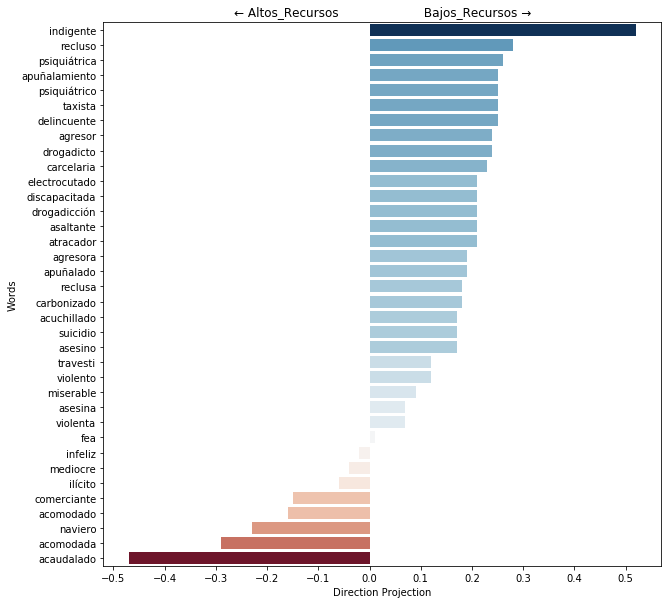

In [ ]:
import matplotlib.pylab as plt

f, ax = plt.subplots(1, figsize=(10, 10))

we_es_socioeco.plot_projection_scores(
    palabras_neutras + espacio_br[:1] + espacio_ar[:1],
    n_extreme=20,
    ax=ax);

In [ ]:
sesgo1 = we_es_socioeco.calc_direct_bias(palabras_neutras, c=None)

#**6. Mitigación del sesgo**

Primero, vamos a mitigar el sesgo de las palabras evaluadas:

In [ ]:
len(palabras_neutras)

35

In [ ]:
we_es_socioeco_debias = we_es_socioeco.debias(method = 'neutralize' , neutral_words= palabras_neutras, inplace=False)

2021-12-05 20:07:20,500 : precomputing L2-norms of word weight vectors
2021-12-05 20:07:22,173 : precomputing L2-norms of word weight vectors


In [ ]:
sesgo2 = we_es_socioeco_debias.calc_direct_bias(palabras_neutras, c=None)

print('El sesgo sin mitigar era de', sesgo1, 'mientas que aplicando una mitigacion desciende a', sesgo2)
print('Obtuvimos una enorme diferencia de', sesgo1-sesgo2)

El sesgo sin mitigar era de 0.1783627834437149 mientas que aplicando una mitigacion desciende a 2.7223306478926394e-08
Obtuvimos una enorme diferencia de 0.17836275622040842


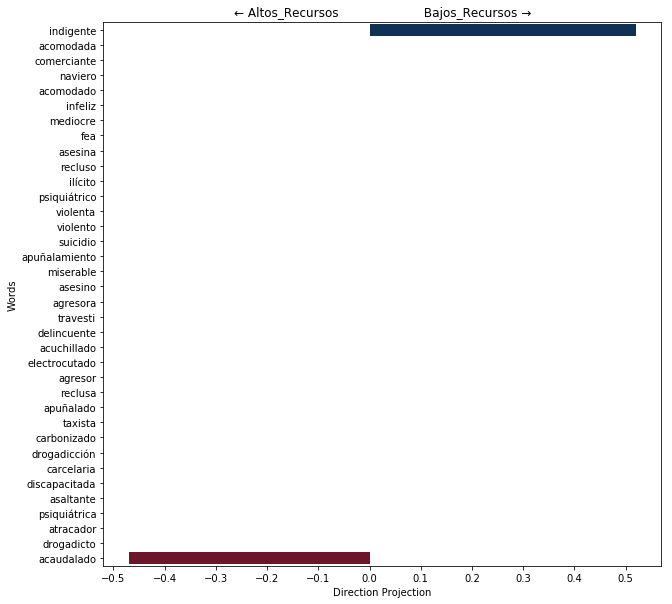

In [ ]:
f, ax = plt.subplots(1, figsize=(10, 10))

we_es_socioeco_debias.plot_projection_scores(
    palabras_neutras + espacio_br[:1] + espacio_ar[:1],
    n_extreme=20,
    ax=ax);

### 6.a. **Inclusión de categorías gramaticales (más allá de nuestra lista de palabras neutras)**

In [ ]:
verbos = [ 
          'comprar',
          'vender',
          'dormir',
          'despertar',
          'soñar',
          'llorar',
          'gritar',
          'hablar',
          'preguntar',
          'pensar',
          'inventar',
          'bailar',
          'cantar',
          'cocinar',
          'sentir',
          'bordar',
          'tejer',
          'coser',
          'razonar',
          'argumentar',
          'cursar',
          'programar'
]

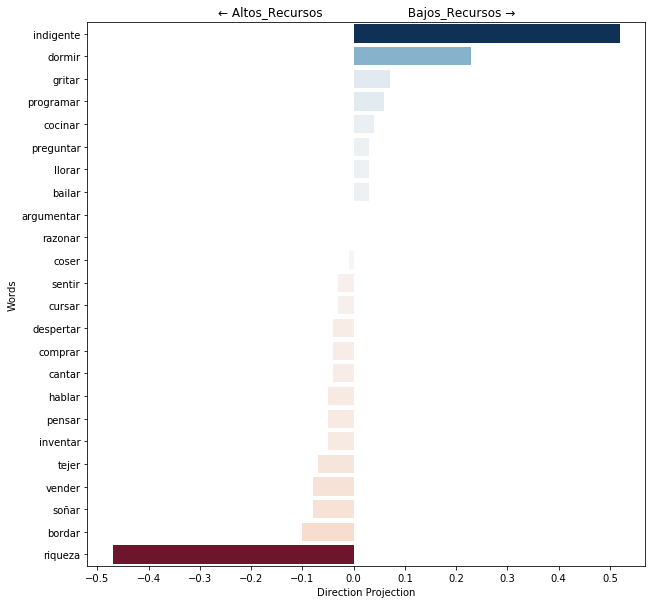

In [ ]:
f, ax = plt.subplots(1, figsize=(10, 10))

we_es_socioeco.plot_projection_scores(
    verbos + ['indigente'] + ['riqueza'],
    n_extreme=20,
    ax=ax);

¿Existen verbos asociados a ser indigente y a la riqueza? Vemos que sí, que acciones como dormir, llorar o gritar están asociados a las personas indigentes. En cambio, acciones como soñar, vender, inventar, hablar, despertar e incluso sentri, están más asociadas a la riqueza.  

In [ ]:
profesiones_colectivos = [
'ingeniería',
'arquitectura',
'psicología',
'enfermería',
'medicina',
'carpintería',
'presidencia',
'biología',
'cocina',
'docencia',
'abogacía',
'cirugía',
'neurocirugía',
'actuación',
'música',
'canto'
]

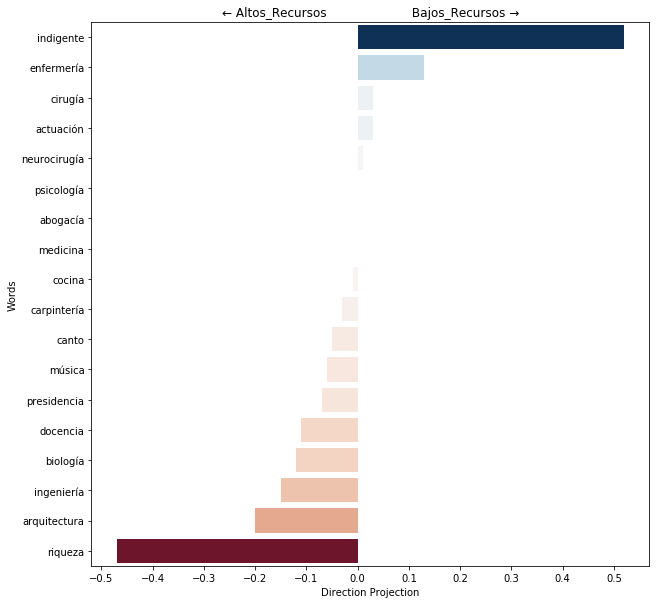

In [ ]:
f, ax = plt.subplots(1, figsize=(10, 10))

we_es_socioeco.plot_projection_scores(
    profesiones_colectivos + ['indigente'] + ['riqueza'],
    n_extreme=20,
    ax=ax);

¿Existen profesiones asociadas a ser indigente y a la riqueza? Vemos que también sí. Sin embargo, en este caso se piensa que estarían indicando aquellas profesiones que mayor contacto pueden tener con pacientes indigentes (enfermería, cirugía y neurocirugía). En cuanto a la actuación, se estima que se trataría de actores/actrices que representan estos roles. Las profesiones asociadas a personas más pudientes incluyen la música, la presidencia, docencia, biología, ingeniería y arquitectura.  

In [ ]:
sustantivos_abstractos = [
'inteligencia',
'belleza',
'humildad',
'sabiduría',
'poder',
'cariño',
'bondad',
'ambición',
'delicadeza',
'amabilidad',
'paciencia',
'popularidad',
'fama',
'generosidad',
'honestidad',
'canto',
'maldad',
'soberbia',
'violencia'
]

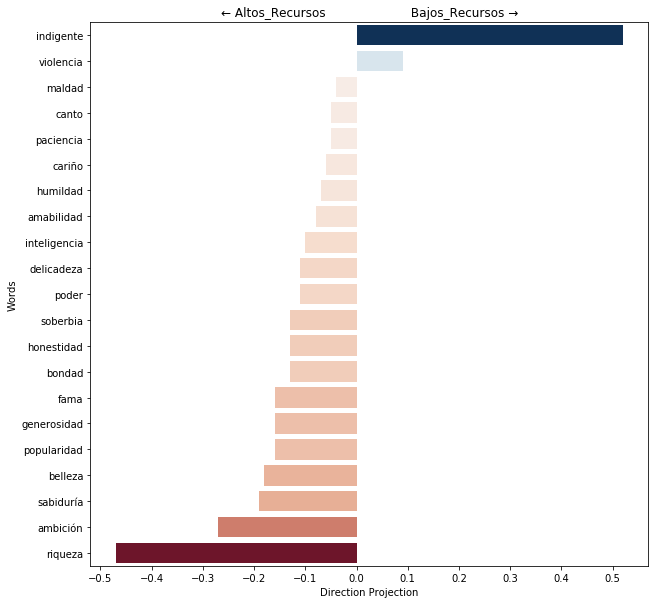

In [ ]:
f, ax = plt.subplots(1, figsize=(10, 10))

we_es_socioeco.plot_projection_scores(
    sustantivos_abstractos + ['indigente'] + ['riqueza'],
    n_extreme=20,
    ax=ax);

Interesante. El único sustiantivo que se asocia con la indigencia es la violencia. 

In [ ]:
adjetivos_neutros = [
'inteligente',
'humilde',
'amable',
'dulce',
'audaz',
'paciente',
'popular',
'flexible',
'grande',
'brillante',
'inocente',
'fácil',
'agradable',
'infeliz',
'capaz',
'difícil',
'temperamental',
]

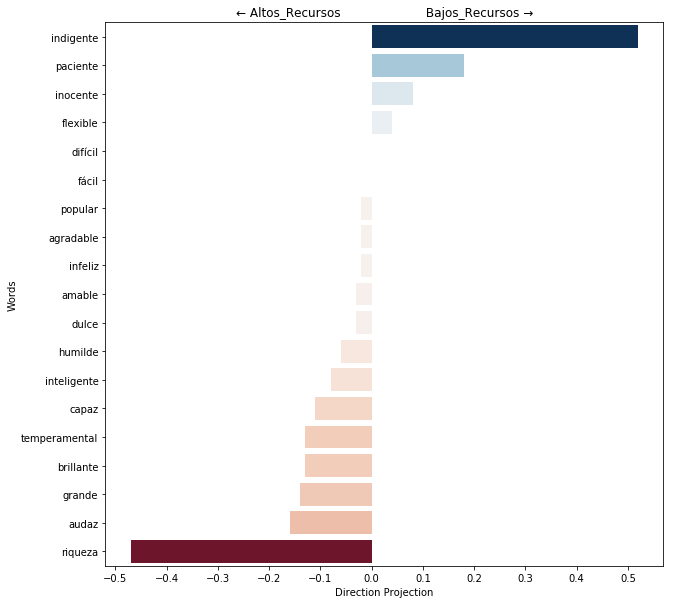

In [ ]:
f, ax = plt.subplots(1, figsize=(10, 10))

we_es_socioeco.plot_projection_scores(
    adjetivos_neutros + ['indigente'] + ['riqueza'],
    n_extreme=20,
    ax=ax);

Ser paciente, inocente y flexible están asociados a las personas indigentes. Por otra parte, audaz, grande, brillante, inteligente, amable y dulce están asociados a la riqueza. Como neutros quedaron difícil y fácil. 

#**7. Ecualización**

Finalmente, debemos ecualizar, es decir poner a la misma distancia todas las palabras que consideramos neutras en relación pares de simetría. En nuestro caso, construimos los siguientes pares:

In [ ]:
palabras_simetricas = [
                       ['pobreza', 'riqueza'],
                       ['indigente', 'acaudalado'],
                       ['pobre', 'pudiente'],
                       ['escasez', 'abundancia'],
                       ['opulencia', 'miseria'],
                       ['indigencia', 'fortuna']
]

In [ ]:
neutras = adjetivos_neutros + sustantivos_abstractos + profesiones_colectivos

In [ ]:
we_es_socioeco_hard_debias = we_es_socioeco.debias(method='hard',
                                               neutral_words=neutras, 
                                               equality_sets=palabras_simetricas,inplace=False)

2021-12-05 21:13:36,362 : precomputing L2-norms of word weight vectors
2021-12-05 21:13:37,943 : precomputing L2-norms of word weight vectors
2021-12-05 21:13:38,042 : precomputing L2-norms of word weight vectors


##7.a. **Profesiones colectivos**

Vamos a ecualizar todas aquellas profesiones que se encontraban sesgadas en relación nuestra variable de estudio y consideramos neutras.

In [ ]:
we_es_socioeco_hard_debias[['arquitectura', 'ingeniería', 'biología', 'docencia', 'enfermería', 'cirugía', 'actuación', 'neurocirugía',
                            'cocina', 'carpintería', 'canto', 'música', 'presidencia' ]] @ socioeco_direction_es

array([ 3.7252903e-08,  4.6566129e-08,  1.8626451e-09,  2.1653250e-08,
       -1.1175871e-08, -4.6566129e-09,  3.7252903e-09, -6.5192580e-09,
        7.4505806e-09, -3.2596290e-09,  7.4505806e-09,  0.0000000e+00,
        5.5879354e-09], dtype=float32)

##7.b. **Sustantivos abstractos**

En el caso de los sustantivos abstractos, todas las palabras analizadas resultaron sesgadas, por lo que las incorporamos a todas.

In [ ]:
we_es_socioeco_hard_debias[['inteligencia','belleza','humildad','sabiduría','poder','cariño','bondad','ambición','delicadeza',
                            'amabilidad','paciencia','popularidad','fama','generosidad','honestidad','canto','maldad','soberbia',
                            'violencia']] @ socioeco_direction_es

array([1.4901161e-08, 4.8428774e-08, 5.5879354e-09, 2.5145710e-08,
       8.3819032e-09, 7.4505806e-09, 1.8626451e-08, 5.5879354e-08,
       4.6566129e-09, 2.0489097e-08, 2.2351742e-08, 9.3132257e-09,
       2.7939677e-08, 2.6077032e-08, 2.9802322e-08, 7.4505806e-09,
       3.7252903e-09, 1.3969839e-08, 1.1175871e-08], dtype=float32)

##7.b. **Adjetivos neutros**

Finalmente, en cuanto a los adjetivos neutros, incluimos todos excepto difícil y fácil, que resultaron neutros en nuestro análisis.

In [ ]:
we_es_socioeco_hard_debias[['inteligente','humilde','amable','dulce','audaz','paciente','popular','flexible','grande','brillante',
                            'inocente','agradable','infeliz','capaz','temperamental']] @ socioeco_direction_es

array([ 1.7695129e-08,  2.1886081e-08,  6.5192580e-09,  3.7252903e-09,
        2.8871000e-08, -3.5390258e-08,  0.0000000e+00,  1.8626451e-09,
        1.8626451e-08,  2.4214387e-08, -1.8626451e-08,  3.7252903e-09,
        9.3132257e-09,  1.3969839e-08,  1.4901161e-08], dtype=float32)

#**Conclusión**

En este trabajo logramos abordar un análisis de sesgos existentes en relación al nivel socioeconómico de las personas. Encontramos una asociación muy fuerte entre las palabras indigente y pobre en relación a acaudalado/a, enriquecimiento y riqueza. Se encontraron mayor cantidad de palabras sesgadas en relación a las personas de muy bajos recursos que a las personas con más recursos. 

Las asociaciones encontradas con la indigencia y pobreza estuvieron relacionadas en mayor medida a la delincuencia, la violencia y comportamientos delictivos y carcelarios. En menor medida, al género y problemas mentales.

Las asociaciones encontradas con personas de altos recursos estuvieron ligadas a la actitudes de acomodo, ilícito y a ciertas profesiones. 

No se encontraron asociaciones con nacionalidades ni con partidos o ideologías políticas. 

En un futuro nos gustaría explorar otros sesgos y prejuicios dentro de nuestra sociedad, tales como gordo-flaco y gorda-flaca, y también explorar qué sucede con la discapacidad, pero no encontramos un antónimo claro para este término, porque no sería "capacidad". Tal vez podríamos probar con diversas discapacidades: ciego vs ¿vidente?, sordo vs ¿oyente? aunque nos parece que no son las palabras correctas. Es fuerte que no haya forma de contrastarlo, esto debe ser porque los sesgos capacitistas están profundamente arraigados en nuestra sociedad  y podemos llamar a lo "distinto" que sale de la norma, pero la norma está implícita, viene arraigada a los conceptos de normal, humanidad, personas, por lo tanto es muy difícil encontrar una palabra exacta que sea antónimo de discapacidad.

